# Assgnment 1 - Supervised Learning
# Customer Segmentation Dataset
## student: hyao66

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import time

### load dataset and EDA
customer segmentation data is from Kaggle

9 independent variables

dependent variable - segment of the customer, 4 segments (A,B,C,D)

URL for the dataset:
https://www.kaggle.com/vetrirah/customer

In [8]:
# read data
raw = pd.read_csv('/content/drive/MyDrive/CS7641A1/customer_segmentation.csv', index_col = 'ID')
raw.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
raw.info()

In [ ]:
raw.isnull().sum()

In [ ]:
# summarize data
print(raw.describe())
a=raw.describe()
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Gender'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Ever_Married'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Graduated'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Profession'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Spending_Score'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Family_Size'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Var_1'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Segmentation'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
# Plot y
sns.countplot(x="Segmentation", data=raw)

In [ ]:
raw.isnull().sum()

In [ ]:
## categorical
xs = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score' , 'Var_1', 'Profession']
y = ["Segmentation"]


def plot_dist_plots(dataset, xx, figsize = (20, 15)):
    fig, axes = plt.subplots(1, len(xx), figsize=figsize)
    fig.suptitle('EDA of Customer Segmentation dataset')

    for index in range(len(xx)):
        sns.countplot(ax = axes[index],x=xx[index], data=dataset)
        plt.xticks(rotation=45)

plot_dist_plots(raw, xs,figsize=(35,10))

In [ ]:
# label encoding for categorical data
raw['Gender'].astype('category')
raw['Ever_Married'].astype('category')
raw['Graduated'].astype('category')
raw['Profession'].astype('category')
raw['Spending_Score'].astype('category')
raw['Var_1'].astype('category')
le = preprocessing.LabelEncoder()
raw['Gender_Cat'] = le.fit_transform(raw['Gender'])
raw['Ever_Married_Cat'] = le.fit_transform(raw['Ever_Married'])
raw['Graduated_Cat'] = le.fit_transform(raw['Graduated'])
raw['Profession_Cat'] = le.fit_transform(raw['Profession'])
raw['Spending_Score_Cat'] = le.fit_transform(raw['Spending_Score'])
raw['Var_1_Cat'] = le.fit_transform(raw['Var_1'])

In [ ]:
print(raw['Gender_Cat'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Ever_Married_Cat'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Graduated_Cat'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Profession_Cat'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Spending_Score_Cat'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['Var_1_Cat'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
raw = raw.fillna(0.01)

In [ ]:
# train test split
# split data into training and testing sets
# Split the data into training and testing sets
raw_cat = raw.drop(["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"], axis = 1)


features = raw_cat.drop(['Segmentation'], axis = 1)
feature_list = list(features.columns)
features_np = np.array(features)

labels = raw_cat[['Segmentation']]
labels_np = np.array(labels)[:,0]

label_unique = list(set(labels_np))

train_features, test_features, train_labels, test_labels = train_test_split(features_np, labels_np, test_size = 0.20, 
                                                                            random_state = 42)

print(feature_list)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

### Algorithm 1: Decision Trees with some form of pruning

In [ ]:
## tunning hyper parameter
tuned_parameters = [{'criterion':["gini","entropy"],
                     'splitter':["best","random"],
                     'max_depth': range(2,25,1),
                     'min_samples_leaf':range(1,10,1),
                     'min_samples_split': range(2,10,2)}]

print()
print(f"Tuning hyperparameters for accuracy")
print()
    
grid_search = GridSearchCV(
                           estimator = DecisionTreeClassifier(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
                           scoring = 'accuracy'
                            )
grid_search.fit(train_features, train_labels)
    
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            grid_search.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}

Grid scores on development set:
0.471 (+/-0.022) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.437 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.471 (+/-0.022) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.438 (+/-0.029) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.471 (+/-0.022) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}
0.444 (+/-0.018) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}
0.471 (+/-0.

In [ ]:
## decision tree
# {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}

t1 = time.time()
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5,min_samples_split=2, min_samples_leaf = 8, random_state = 42)
clf.fit(train_features, train_labels)
t2 = time.time()
print(t2-t1)

0.02084970474243164


In [ ]:
clf.score(train_features, train_labels)

0.5317632475983886

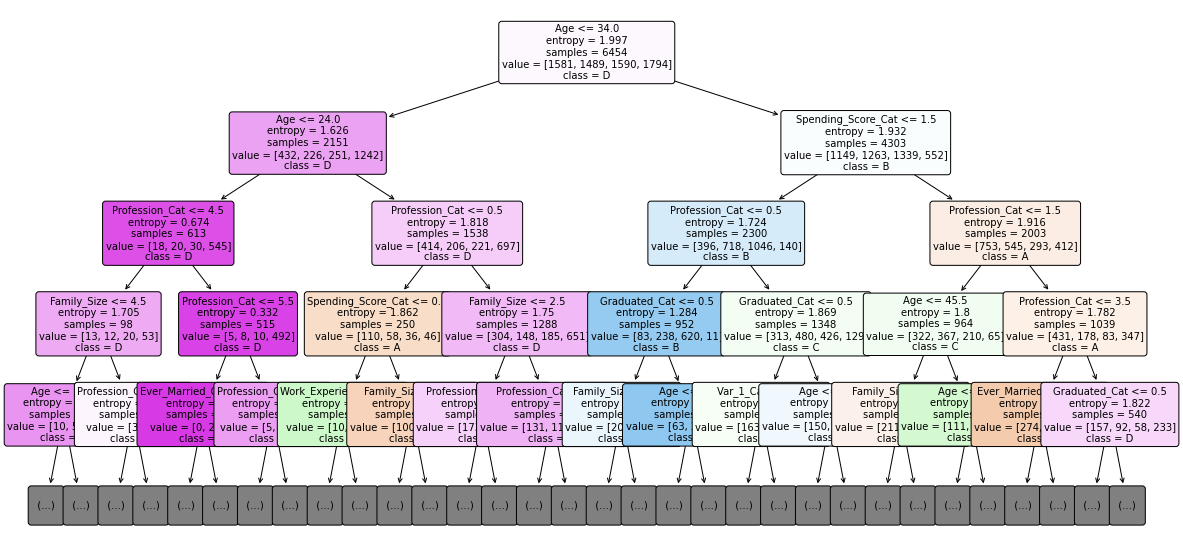

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(20,10))

# label_unique = list(set(labels_np))

#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_list,
                   #use the class names stored
                   class_names = label_unique,
                   max_depth = 4,
                   rounded = True,
                   filled = True,
                   fontsize=10)
#show the plot
plt.show()

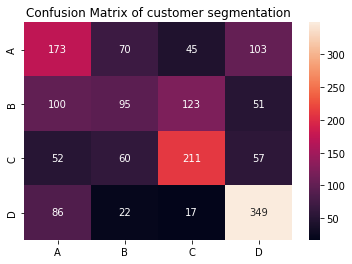

In [ ]:
## test performance
test_pred_decision_tree = clf.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix,index=["A", "B", "C", "D"],columns=["A", "B", "C", "D"])

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of customer segmentation")
plt.show()

In [ ]:

## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_decision_tree))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_decision_tree, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_decision_tree))

print('--------------------------------------------------------------------------------------------------------------')

#extract importance
importance = pd.DataFrame({'feature': feature_list, 
'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

print('--------------------------------------------------------------------------------------------------------------')


Accuracy
0.5130111524163569
--------------------------------------------------------------------------------------------------------------
Precision
   precision
A   0.420925
C   0.384615
B   0.532828
D   0.623214
--------------------------------------------------------------------------------------------------------------
Recall
     Recall
A  0.442455
C  0.257453
B  0.555263
D  0.736287
--------------------------------------------------------------------------------------------------------------
f1
         f1
A  0.431421
C  0.308442
B  0.543814
D  0.675048
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.42      0.44      0.43       391
           B       0.38      0.26      0.31       369
           C       0.53      0.56      0.54       380
           D       0.62      0.74      0.68       474

    accuracy                           0.51      16

In [ ]:
## plot learning curve

length = [645,1290,1935,2580,3225,3870,4515,5160,5805,6454]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5,min_samples_split=2, min_samples_leaf = 8, random_state = 42)
    clf.fit(train_features_alength, train_labels_alength)
    
    train_acc = clf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_decision_tree = clf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_decision_tree)
    test_er = 1- test_acc
    test_error.append(test_er)

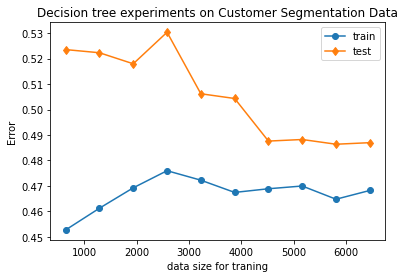

In [ ]:
plt.figure()
plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('Decision tree experiments on Customer Segmentation Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 2: Neural Networks

In [ ]:
## grid search for MLP classifier
## tunning hyper parameter
tuned_parameters = [{'solver': ['adam', 'sgd'],
                     'activation':['logistic', 'tanh', 'relu'],
                     'hidden_layer_sizes': [(100,100,100,100,100,100), (120, 100, 80, 60, 40, 20), (100, 80, 60, 40, 20), (100,100,50,50)],
                     'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
                    }]



print()
print(f"Tuning hyperparameters for accuracy")
print()
    
grid_search = GridSearchCV(
                           estimator = MLPClassifier(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
                           scoring = 'accuracy'
                            )
grid_search.fit(train_features, train_labels)
    
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            grid_search.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy

Best parameters set found on development set:

{'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}

Grid scores on development set:
0.321 (+/-0.174) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.278 (+/-0.001) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.511 (+/-0.037) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}
0.278 (+/-0.001) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.504 (+/-0.020) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.01, 'solver': 'adam'}
0.278 (+/-0.001) for {

In [ ]:
# Tuning hyperparameters for accuracy

# Best parameters set found on development set:

# {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
t1 = time.time()
MLPclf = MLPClassifier(activation='logistic', hidden_layer_sizes= (100, 100, 50, 50), learning_rate_init=0.001, solver='adam', max_iter = 1000)
MLPclf.fit(train_features, train_labels)
t2 = time.time()
print(t2-t1)

87.53641629219055


In [ ]:
MLPclf.score(train_features, train_labels)

0.5356368143786799

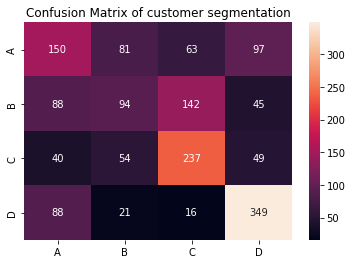

Accuracy
0.5142503097893433
--------------------------------------------------------------------------------------------------------------
Precision
   precision
A   0.409836
C   0.376000
B   0.517467
D   0.646296
--------------------------------------------------------------------------------------------------------------
Recall
     Recall
A  0.383632
C  0.254743
B  0.623684
D  0.736287
--------------------------------------------------------------------------------------------------------------
f1
         f1
A  0.396301
C  0.303716
B  0.565632
D  0.688363
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.41      0.38      0.40       391
           B       0.38      0.25      0.30       369
           C       0.52      0.62      0.57       380
           D       0.65      0.74      0.69       474

    accuracy                           0.51      16

In [ ]:
## test performance
test_pred_MLP = MLPclf.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_MLP)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix,index=["A", "B", "C", "D"],columns=["A", "B", "C", "D"])

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of customer segmentation")
plt.show()


## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_MLP))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_MLP, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_MLP, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_MLP, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_MLP))

print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
## plot learning curve

length = [645,1290,1935,2580,3225,3870,4515,5160,5805,6454]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    mlpclf = MLPClassifier(activation='logistic', hidden_layer_sizes= (100, 100, 50, 50), learning_rate_init=0.001, solver='adam', max_iter = 1000)
    mlpclf.fit(train_features_alength, train_labels_alength)
    
    train_acc = mlpclf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_mlp = mlpclf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_mlp)
    test_er = 1- test_acc
    test_error.append(test_er)

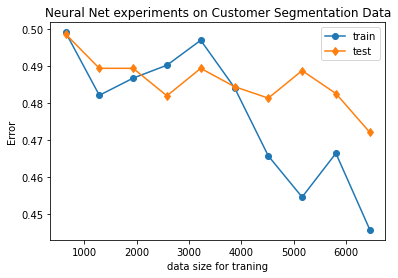

In [ ]:
plt.figure()
plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('Neural Net experiments on Customer Segmentation Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 3: Boosting

In [ ]:
## grid search for GBDT
## tunning hyper parameter
tuned_parameters = [{
                    #  'loss': ['deviance', 'exponential'],
                     'n_estimators':[10, 20, 50, 80, 100],
                    #  'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
                     'learning_rate': [0.001, 0.01, 0.1],
                     'max_depth': range(2,20,1)
                    #  'min_samples_leaf':range(1,10,1),
                    #  'min_samples_split': range(2,10,2)
                    }]



print()
print(f"Tuning hyperparameters for accuracy")
print()
    
grid_search = GridSearchCV(
                           estimator = GradientBoostingClassifier(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
                           scoring = 'accuracy'
                            )
grid_search.fit(train_features, train_labels)
    
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            grid_search.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

Grid scores on development set:
0.278 (+/-0.001) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 10}
0.278 (+/-0.001) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 20}
0.278 (+/-0.001) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}
0.375 (+/-0.020) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 80}
0.375 (+/-0.020) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}
0.278 (+/-0.001) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10}
0.278 (+/-0.001) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 20}
0.350 (+/-0.027) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}
0.371 (+/-0.009) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 80}
0.412 (+/-0.018) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}
0

In [ ]:
# Tuning hyperparameters for accuracy

# Best parameters set found on development set:

# {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

t1 = time.time()
GBclf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth = 4)
GBclf.fit(train_features, train_labels)
t2 = time.time()
print(t2-t1)

3.898263931274414


In [ ]:
GBclf.score(train_features, train_labels)

0.5985435388906105

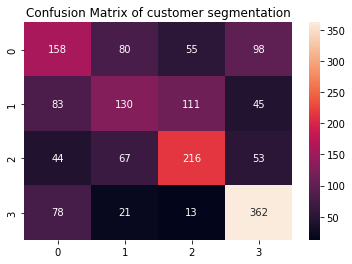

--------------------------------------------------------------------------------------------------------------
Accuracy
0.5365551425030979
--------------------------------------------------------------------------------------------------------------
Precision
   precision
A   0.435262
C   0.436242
B   0.546835
D   0.648746
--------------------------------------------------------------------------------------------------------------
Recall
     Recall
A  0.404092
C  0.352304
B  0.568421
D  0.763713
--------------------------------------------------------------------------------------------------------------
f1
         f1
A  0.419098
C  0.389805
B  0.557419
D  0.701550
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.44      0.40      0.42       391
           B       0.44      0.35      0.39       369
           C       0.55      0.57      0.56      

In [ ]:
# test performance
test_pred_GB = GBclf.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_GB
)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of customer segmentation")
plt.show()


print('--------------------------------------------------------------------------------------------------------------')


## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_GB))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_GB, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_GB, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_GB, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_GB))

print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
## plot learning curve

length = [645,1290,1935,2580,3225,3870,4515,5160,5805,6454]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    gbpclf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth = 4)
    gbpclf.fit(train_features_alength, train_labels_alength)
    
    train_acc = gbpclf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_gb = gbpclf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_gb)
    test_er = 1- test_acc
    test_error.append(test_er)

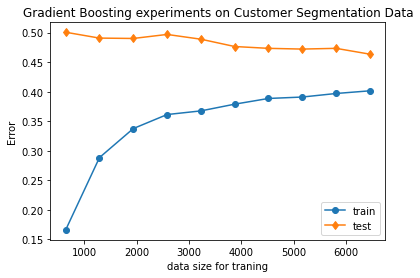

In [ ]:
plt.figure()
plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('Gradient Boosting experiments on Customer Segmentation Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 4: SVM

In [ ]:
## tunning for SVM

tuned_parameters = [{
                     'kernel':['linear','rbf','sigmoid'],
                     'C': [0.01,0.1,1,10],
                     'gamma': ['scale', 'auto']
                    }]



print()
print(f"Tuning hyperparameters for accuracy")
print()
    
grid_search = GridSearchCV(
                           estimator = svm.SVC(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
                           scoring = 'accuracy'
                            )
grid_search.fit(train_features, train_labels)
    
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            grid_search.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy

Best parameters set found on development set:

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on development set:
0.493 (+/-0.025) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
0.404 (+/-0.003) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.278 (+/-0.001) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.493 (+/-0.025) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
0.284 (+/-0.001) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
0.278 (+/-0.001) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.492 (+/-0.020) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.441 (+/-0.017) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.241 (+/-0.039) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.492 (+/-0.020) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.481 (+/-0.010) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.278 (+/-0.001) for {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.494 (

In [ ]:
# {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
t1 = time.time()
svmclf = svm.SVC(C=1, gamma = 'auto', kernel = 'rbf')
svmclf.fit(train_features, train_labels)
t2 = time.time()
print(t2-t1)

6.191318511962891


In [ ]:
svmclf.score(train_features, train_labels)

0.6605206073752712

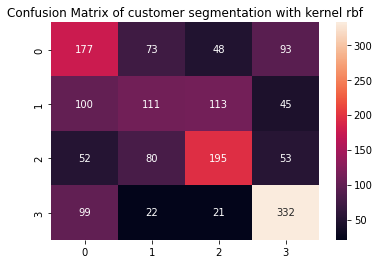

--------------------------------------------------------------------------------------------------------------
Accuracy
0.5049566294919455
--------------------------------------------------------------------------------------------------------------
Precision
   precision
D   0.413551
B   0.388112
A   0.517241
C   0.634799
--------------------------------------------------------------------------------------------------------------
Recall
     Recall
D  0.452685
B  0.300813
A  0.513158
C  0.700422
--------------------------------------------------------------------------------------------------------------
f1
         f1
D  0.432234
B  0.338931
A  0.515192
C  0.665998
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.41      0.45      0.43       391
           B       0.39      0.30      0.34       369
           C       0.52      0.51      0.52      

In [ ]:
# test performance
test_pred_svm = svmclf.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_svm
)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of customer segmentation with kernel rbf")
plt.show()


print('--------------------------------------------------------------------------------------------------------------')


## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_svm))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_svm, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_svm, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_svm, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_svm))

print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
## plot learning curve

length = [645,1290,1935,2580,3225,3870,4515,5160,5805,6454]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    svmclf = svm.SVC(C=1, gamma = 'auto', kernel = 'rbf')
    svmclf.fit(train_features_alength, train_labels_alength)
    
    train_acc = svmclf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_svm = svmclf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_svm)
    test_er = 1- test_acc
    test_error.append(test_er)

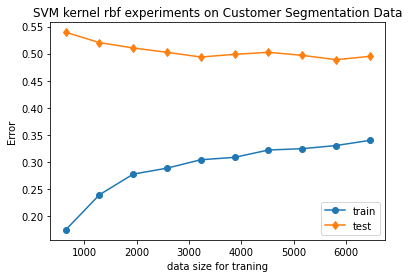

In [ ]:
plt.figure()
plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('SVM kernel rbf experiments on Customer Segmentation Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

In [ ]:
svmclf2 = svm.SVC(C=1, gamma = 'auto', kernel = 'linear')
svmclf2.fit(train_features, train_labels)

SVC(C=1, gamma='auto', kernel='linear')

In [ ]:
svmclf2.score(train_features, train_labels)

0.49597149054849704

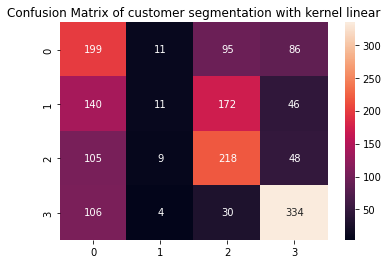

--------------------------------------------------------------------------------------------------------------
Accuracy
0.4721189591078067
--------------------------------------------------------------------------------------------------------------
Precision
   precision
D   0.361818
B   0.314286
A   0.423301
C   0.649805
--------------------------------------------------------------------------------------------------------------
Recall
     Recall
D  0.508951
B  0.029810
A  0.573684
C  0.704641
--------------------------------------------------------------------------------------------------------------
f1
         f1
D  0.422954
B  0.054455
A  0.487151
C  0.676113
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.36      0.51      0.42       391
           B       0.31      0.03      0.05       369
           C       0.42      0.57      0.49      

In [ ]:
# test performance
test_pred_svm = svmclf2.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_svm
)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of customer segmentation with kernel linear")
plt.show()


print('--------------------------------------------------------------------------------------------------------------')


## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_svm))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_svm, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_svm, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_svm, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_svm))

print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
## plot learning curve

length = [645,1290,1935,2580,3225,3870,4515,5160,5805,6454]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    svmclf2 = svm.SVC(C=1, gamma = 'auto', kernel = 'linear')
    svmclf2.fit(train_features_alength, train_labels_alength)
    
    train_acc = svmclf2.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_svm = svmclf2.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_svm)
    test_er = 1- test_acc
    test_error.append(test_er)

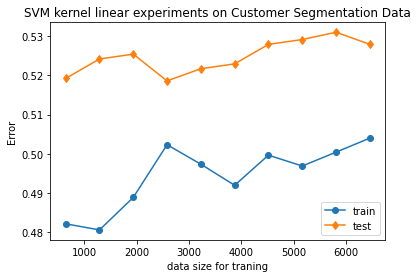

In [ ]:
plt.figure()
plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('SVM kernel linear experiments on Customer Segmentation Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 5: KNN

In [ ]:
## tunning for K

k_range = range(1,50,2)

score_train = []
score_test = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='minkowski', p = 2, metric_params=None, weights='uniform')

  knn.fit(train_features, train_labels)

  y_pred = knn.predict(train_features)

  train_acc = metrics.accuracy_score(train_labels, y_pred)
  score_train.append(train_acc)


  ## test performance
  test_pred_knn = knn.predict(test_features)

  test_acc = metrics.accuracy_score(test_labels, test_pred_knn)
  score_test.append(test_acc)


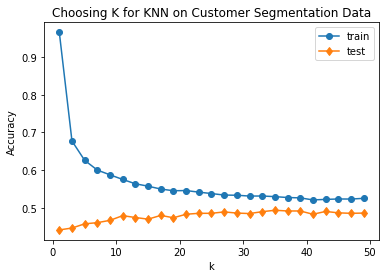

In [ ]:
plt.figure()

plt.plot(k_range, score_train, marker='o')
plt.ylabel('Accuracy')
plt.title('Choosing K for KNN on Customer Segmentation Data')
plt.plot(k_range, score_test, marker='d')
plt.xlabel('k')
plt.legend(['train', 'test'])

In [ ]:
t1 = time.time()
knn = KNeighborsClassifier(n_neighbors=25, algorithm='auto', metric='minkowski', p = 2, metric_params=None, weights='uniform')
knn.fit(train_features, train_labels)
t2 = time.time()
print(t2-t1)

0.03764224052429199


In [ ]:
knn.score(train_features, train_labels)

0.5381158971180663

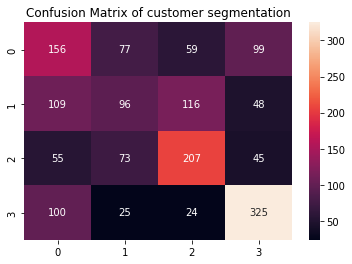

--------------------------------------------------------------------------------------------------------------
Accuracy
0.4857496902106567
--------------------------------------------------------------------------------------------------------------
Precision
   precision
A   0.371429
C   0.354244
B   0.509852
D   0.628627
--------------------------------------------------------------------------------------------------------------
Recall
     Recall
A  0.398977
C  0.260163
B  0.544737
D  0.685654
--------------------------------------------------------------------------------------------------------------
f1
         f1
A  0.384710
C  0.300000
B  0.526718
D  0.655903
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.37      0.40      0.38       391
           B       0.35      0.26      0.30       369
           C       0.51      0.54      0.53      

In [ ]:
# test performance
test_pred_knn = knn.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_knn
)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of customer segmentation")
plt.show()


print('--------------------------------------------------------------------------------------------------------------')


## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_knn))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_knn, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_knn, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_knn, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_knn))

print('--------------------------------------------------------------------------------------------------------------')

In [ ]:
# plot learning curve

length = [645,1290,1935,2580,3225,3870,4515,5160,5805,6454]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    knn = KNeighborsClassifier(n_neighbors=25, algorithm='auto', metric='minkowski', p = 2, metric_params=None, weights='uniform')
    knn.fit(train_features_alength, train_labels_alength)
    
    train_acc = knn.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_knn = knn.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_knn)
    test_er = 1- test_acc
    test_error.append(test_er)

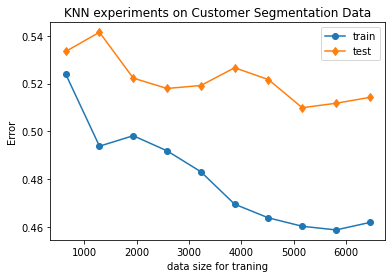

In [ ]:
plt.figure()
plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('KNN experiments on Customer Segmentation Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])